# Exploring 'World Development Indicators' Dataset and finding the relationship between CO2 emissions per cpaita and GDP per capita for USA, India and China. 

> It is an important analysis for countries around the world to understand that their development has an environmental cost and to keep that in mind while planning their robust industrial and urban development projects. 

We will use the following indicators between the years **1960 - 2011**: 
* CO2 emissions (metric tons per capita)
* GDP per capita (constant 2005 US$)

Let's start the analysis! 


In [1]:
# Importing the important libraries for this case study
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

import os
#print(os.listdir("../input"))


In [2]:
# Importing Data from the indicators file
data = pd.read_csv('../input/Indicators.csv')


In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


> ## Uniqueness and Other Factors
The number of unique countries and country codes should be the same. At the same, we need to analyse the number of indicators. 

In [4]:
countries = data['CountryName'].unique().tolist()
codes = data['CountryCode'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()
print("Countries: %d" % (len(countries))) #Old method of printing
print("Country Codes: {}".format(len(codes)))
print("Indicators: {}".format(len(indicators)))

Countries: 247
Country Codes: 247
Indicators: 1344


    The number of years of data that we have in this data set and the time frame

In [5]:
years = data['Year'].unique().tolist()
print(len(years))
print("Data is available from {} to {}".format(min(years), max(years)))

56
Data is available from 1960 to 2015


Let's look for any null values 


In [6]:
print(data.isnull().any().any())
print("\n")
print(data.isnull().sum())

False


CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64


### Preliminary Results: 
After preliminary examination, we find out that the number of countries is equal to the country codes. There is **no null** data and there are a lot of indicators to choose from. Howevever, our examination will refrain to only two major indicators to find out there correlation for India, China and USA. 

> ## Collecting First Indicator Data 

> Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA

In [7]:
first_indicator = 'CO2 emissions \(metric'
country = 'USA'

mask1 = data['IndicatorName'].str.contains(first_indicator) 
mask2 = data['CountryCode'].str.contains(country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage_USA = data[mask1 & mask2]

Let's plot the graph for CO2 emissions in USA to understand the trendline over years

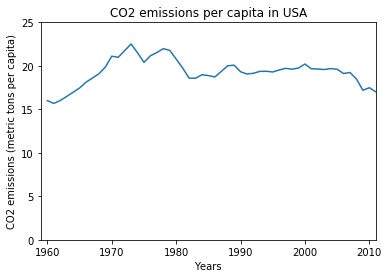

In [8]:
#Plotting a line graph 

x_years = stage_USA['Year'].values
y_values = stage_USA['Value'].values
plt.xlabel('Years')
plt.ylabel(stage_USA['IndicatorName'].iloc[0])
plt.title('CO2 emissions per capita in USA')
#We can make a more intuitive graph by setting the axis values. You are free to comment this out
plt.axis([1959, 2011, 0, 25])  #Here, I set the y axis between 0 and 25 and x axis between 1959 to 2011

#plot function 
plt.plot(x_years, y_values)


Let's collect similar data for India and China and see their trendlines. 


In [9]:
#collecting data for India 

first_indicator = 'CO2 emissions \(metric'
country = 'India'

mask1 = data['IndicatorName'].str.contains(first_indicator) 
mask2 = data['CountryName'].str.contains(country)  #Notice how we are using Country Name here, rather than the Country Code 

stage_India = data[mask1 & mask2]

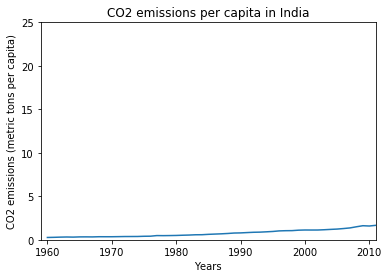

In [10]:
#Plotting a line graph for India

x_years = stage_India['Year'].values
y_values = stage_India['Value'].values
plt.xlabel('Years')
plt.ylabel(stage_India['IndicatorName'].iloc[0])
plt.title('CO2 emissions per capita in India')

plt.axis([1959, 2011, 0, 25])  
#If we are comparing with USA but we can also keep it to scale but since we are taking into account three countries here, I am keeping the scale constant

#plot function 
plt.plot(x_years, y_values)


In [11]:
#collecting data for China

first_indicator = 'CO2 emissions \(metric'
country = 'China'

mask1 = data['IndicatorName'].str.contains(first_indicator) 
mask2 = data['CountryName'].str.contains(country)  


stage_China = data[mask1 & mask2]

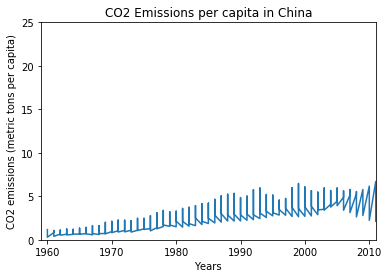

In [12]:
# Plotting a graph for China 
x_years = stage_China['Year'].values
y_values = stage_China['Value'].values

plt.xlabel('Years')
plt.ylabel(stage_China['IndicatorName'].iloc[0])
plt.title('CO2 Emissions per capita in China')

plt.axis([1959, 2011, 0, 25])
plt.plot(x_years, y_values)


## ERROR
**Here, I noticed a major descrepancy in the China plot where there were multiple issues with the grah and there was inconsistent plotting. Here's how I solved it. **


In [13]:
# Let's look at the number of values of the China plot and see where it went wrong. 
print(len(stage_USA))
print(len(stage_India))
print(len(stage_China))

#As we saw above there are more values in the China plot. Let's see why. 
stage_China.head(15)

52
52
156


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7160,China,CHN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.170381
11224,"Hong Kong SAR, China",HKG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.960982
14272,"Macao SAR, China",MAC,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.299424
31454,China,CHN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.836047
36124,"Hong Kong SAR, China",HKG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,1.064878
39570,"Macao SAR, China",MAC,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.397825
58654,China,CHN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.661428
63649,"Hong Kong SAR, China",HKG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.115011
67276,"Macao SAR, China",MAC,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.526679
87039,China,CHN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.640002


As we can see here, the country code for China is CHN. However, they have also included Hong Kong and Macau in the same graph and are grouped by the Country Name China itself. This is why China had more data points. 
So, we need to correct that. Let's group China by CHN.

In [14]:
#Collecting Data grouped by CHN 
first_indicator = 'CO2 emissions \(metric'
country = 'CHN'

mask1 = data['IndicatorName'].str.contains(first_indicator) 
mask2 = data['CountryCode'].str.contains(country)  #changed back to CountryCode


stage_China = data[mask1 & mask2]
len(stage_China)

52

We now get the same number of data points for China, USA and India. Let's plot the graph. 


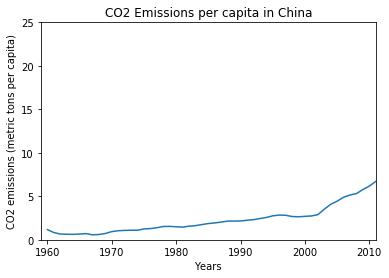

In [15]:
# Plotting a graph for China with the new grouping 

x_years = stage_China['Year'].values
y_values = stage_China['Value'].values

plt.xlabel('Years')
plt.ylabel(stage_China['IndicatorName'].iloc[0])
plt.title('CO2 Emissions per capita in China')

plt.axis([1959, 2011, 0, 25])
plt.plot(x_years, y_values)


After plotting the first set of indicators, we have a rough idea of the kind of data we're dealing with. Any Outliers have also been dealt with in this inital data. The first question we may have is why exactly does USA have such high emission values compared to India and China even though all three of them are heavily industrialized. I am writing another notebook on that analysis and will soon update that link here. 


## Collecting the second indicator data

Our second indicator is **GDP per capita** 
This time we will not plot the data as we have already done that once. We will only do the final correlation analysis. 

In [16]:
# select GDP Per capita emissions for the United States
second_indicator = 'GDP per capita \(constant 2005'
country = 'USA'

mask1 = data['IndicatorName'].str.contains(second_indicator) 
mask2 = data['CountryCode'].str.contains(country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage_USA = data[mask1 & mask2]
print(len(gdp_stage_USA))
gdp_stage_USA.head()

55


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


In [17]:
# select GDP Per capita emissions for the India
second_indicator = 'GDP per capita \(constant 2005'
country = 'India'

mask1 = data['IndicatorName'].str.contains(second_indicator) 
mask2 = data['CountryName'].str.contains(country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage_India = data[mask1 & mask2]
print(len(gdp_stage_India))
gdp_stage_India.head()

55


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11616,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470
36555,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053
64095,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,234.166685
92540,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,243.176418
121337,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,255.963668


In [18]:
# select GDP Per capita emissions for the India
second_indicator = 'GDP per capita \(constant 2005'
country = 'CHN'

mask1 = data['IndicatorName'].str.contains(second_indicator) 
mask2 = data['CountryCode'].str.contains(country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage_China = data[mask1 & mask2]
print(len(gdp_stage_China))
gdp_stage_China.head()

55


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7187,China,CHN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,121.191585
31484,China,CHN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,89.005585
58684,China,CHN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,83.334735
87069,China,CHN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,89.605409
115795,China,CHN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,103.571525


## Plotting a scatter plot to find relation between GDP per capita and CO2 emissions per capita


### IMPORTANT 
We have the same number of datapoints ( 55 ) for all three countries for this indicator. However, something you might have noticed is that the number of datapoints is different this time. For CO2 emissions, we have 52 datapoints. For GDP per capita, we have 55 datapoints. This will lead to error in the analysis. Hence, we need to correct that. 

In [19]:
# We'll need to make sure we're looking at the same time frames

print("GDP Min Year = ", gdp_stage_USA['Year'].min(), "max: ", gdp_stage_USA['Year'].max())
print("CO2 Min Year = ", stage_USA['Year'].min(), "max: ", stage_USA['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot). 

In [20]:
gdp_stage_trunc_USA = gdp_stage_USA[gdp_stage_USA['Year'] < 2012]
print(len(gdp_stage_trunc_USA))
print(len(stage_USA))

#Let's do it for the other two as well 

gdp_stage_trunc_India = gdp_stage_India[gdp_stage_India['Year'] < 2012]
gdp_stage_trunc_China = gdp_stage_China[gdp_stage_China['Year'] < 2012]


52
52


** Plotting the scatter plot for all the three countries **

#### USA

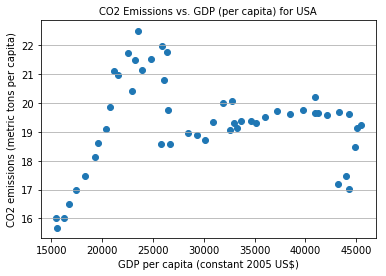

In [21]:
%matplotlib inline

#Plotting a subplot 
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP (per capita) for USA',fontsize=10)
axis.set_xlabel(gdp_stage_trunc_USA['IndicatorName'].iloc[0],fontsize=10)   
axis.set_ylabel(stage_USA['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc_USA['Value']                   # Obtaining GDP values 
Y = stage_USA['Value']                             # Obtaining CO2 values

axis.scatter(X, Y)
plt.show()

There seems to be an initial relation but no relation later. It seems like there isn't much correlation between these two factors in USA. We'll analyse this in a while. Let's do this for the other two countries as well.

#### INDIA

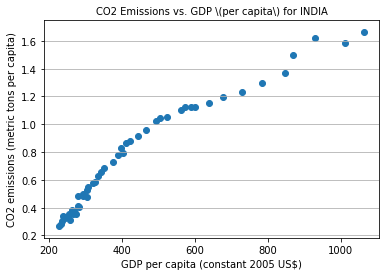

In [22]:
%matplotlib inline

#Plotting a subplot
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\) for INDIA',fontsize=10)
axis.set_xlabel(gdp_stage_trunc_India['IndicatorName'].iloc[0],fontsize=10)   
axis.set_ylabel(stage_India['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc_India['Value']                   # Obtaining GDP values 
Y = stage_India['Value']                             # Obtaining CO2 values

axis.scatter(X, Y)
plt.show()

There seems to be a little bit of correlation. 

#### CHINA


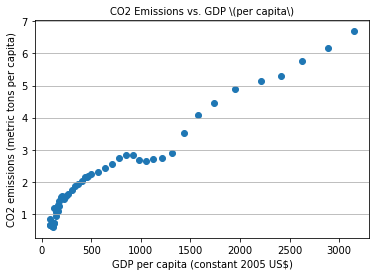

In [23]:
%matplotlib inline

#Plotting a subplot
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc_China['IndicatorName'].iloc[0],fontsize=10)   
axis.set_ylabel(stage_China['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc_China['Value']                   # Obtaining GDP values 
Y = stage_China['Value']                             # Obtaining CO2 values

axis.scatter(X, Y)
plt.show()

There can be some correlation here. Let's find out. 

**Now, we have plotted the graphs and we have some rough idea about these graphs but we cannot conclude yet. Let's use the correlation coefficient function and find out the value.** That might be helpful. **

In [24]:
# Correlation for USA
corr_USA = np.corrcoef(gdp_stage_trunc_USA['Value'],stage_USA['Value'])
print("The correlation value for USA is: {}".format(corr_USA[1][0]))

The correlation value for USA is: 0.07676004947239425


In [25]:
corr_India = np.corrcoef(gdp_stage_trunc_India['Value'],stage_India['Value'])
print("The correlation value for India is: {}".format(corr_India[1][0]))

The correlation value for India is: 0.9675375804903926


In [26]:
corr_China = np.corrcoef(gdp_stage_trunc_China['Value'],stage_China['Value'])
print("The correlation value for China is: {}".format(corr_China[1][0]))

The correlation value for China is: 0.9802166377386855


## Result:- 
With this, we come to an end of this analysis. We followed a particular methodology and have come to this conclusion. We see that there is a pretty weak correlation between GDP per capita and CO2 emissions in the case of USA i.e. 0.077. However, on the other hand, we have India and China with a correlation coefficient of 0.967 and 0.98 respectively. The first question is obviously - 'Why is there such a relationship?'.

On a closer look, we can classify India and China as developing nations ( or atleast for the majority of the timeframe) while US would be considered as a developed nation. This clustering obviously plays an important role here. We can say that as developing countries try to build their economies faster, they may produce large quantities of CO2 while developed nations on the other hand become conscious of their surroundings and try to take care of their CO2 emissions so even though they do see a GDP growth, they do not witness a CO2 emission rise. 

Some of you may argue that if the above was true then why did USA have higher emissions per capita in the first plots. It is important to note that while USA had higher per capita emissions, it has a much lower population than the other two nations and we need to look at the gross metric tonne production of CO2 instead. 

All of these ideas are important. There are many indicators that were not considered, for example _  energy access and consumption, industrialization level and population growth. While trying to find these implications is important let's not forget that this was not what we were trying to find initially. 

**Our goal was to find the relation between GDP per capita and CO2 emissions and the result is:** 
> "GDP per capita and CO2 emissions per capita have a weak relationship in the case of developed nations but have a high correlation in the case of developing nations" 




### Scope for improvement 
There are many things that can be improved here. I will try to do that but so should you and these are the things you could work on. 
* Inculcating more indicators to make the analysis more refined and accurate. 
* Taking more countries in both the clusters. An addition to that would be clustering all the 247 countries into two groups( or more but distinct groups) based on their economic growth and then finding correlation values for all the countries and then drawing conclusions 
* Finding out what is the reason of this result and do comment about that further. 

I would request you to write about this work. I want both good and bad reviews to understand where I can improve this project. Thank you!

* Presented by:- Prakhar Rathi 
* Inspired by:- Leo Porter - UC SAN Diego 